In [1]:
import keras 
from keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 209s 1us/step


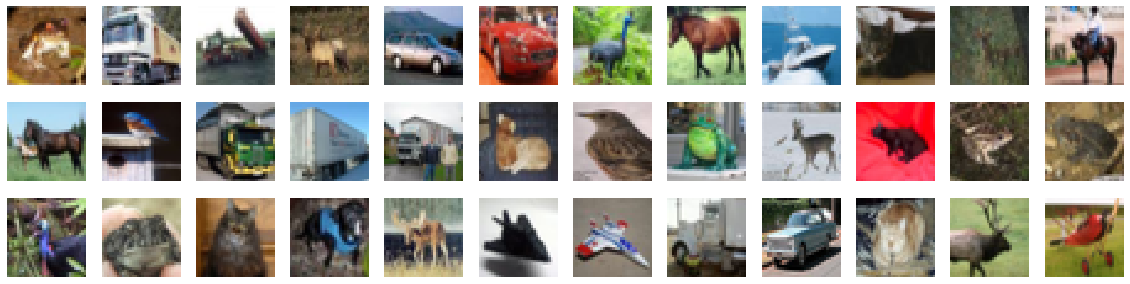

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))


In [0]:
x_train=x_train.astype('float32')/255
x_test=x_test.astype('float32')/255

In [4]:
x_test


array([[[[0.61960787, 0.4392157 , 0.19215687],
         [0.62352943, 0.43529412, 0.18431373],
         [0.64705884, 0.45490196, 0.2       ],
         ...,
         [0.5372549 , 0.37254903, 0.14117648],
         [0.49411765, 0.35686275, 0.14117648],
         [0.45490196, 0.33333334, 0.12941177]],

        [[0.59607846, 0.4392157 , 0.2       ],
         [0.5921569 , 0.43137255, 0.15686275],
         [0.62352943, 0.44705883, 0.1764706 ],
         ...,
         [0.53333336, 0.37254903, 0.12156863],
         [0.49019608, 0.35686275, 0.1254902 ],
         [0.46666667, 0.34509805, 0.13333334]],

        [[0.5921569 , 0.43137255, 0.18431373],
         [0.5921569 , 0.42745098, 0.12941177],
         [0.61960787, 0.43529412, 0.14117648],
         ...,
         [0.54509807, 0.38431373, 0.13333334],
         [0.50980395, 0.37254903, 0.13333334],
         [0.47058824, 0.34901962, 0.12941177]],

        ...,

        [[0.26666668, 0.4862745 , 0.69411767],
         [0.16470589, 0.39215687, 0.5803922 ]

In [0]:
from keras import utils
(x_train,x_valid)=x_train[5000:],x_train[:5000]
(y_train,y_valid)=y_train[5000:],y_train[:5000]

In [0]:
n_classes=len(np.unique(y_train))
y_train=utils.to_categorical(y_train,n_classes)
y_valid=utils.to_categorical(y_valid,n_classes)
y_test=utils.to_categorical(y_test,n_classes)

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
datagenerator_train=ImageDataGenerator(width_shift_range=0.2,
                                      height_shift_range=0.2,
                                      rotation_range=50,
                                      horizontal_flip=True)
datagenerator_train.fit(x_train)

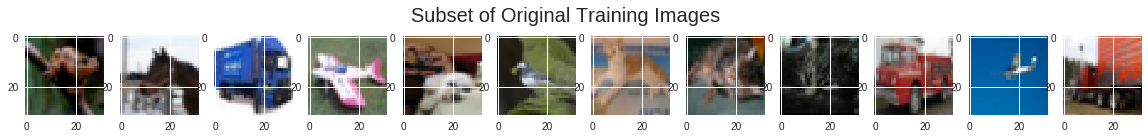

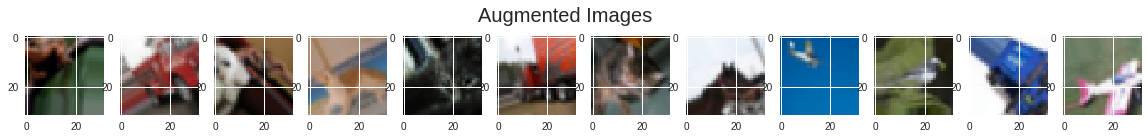

In [9]:
import matplotlib.pyplot as plt

# take subset of training data
x_train_subset = x_train[:12]

# visualize subset of training data
fig = plt.figure(figsize=(20,2))
for i in range(0, len(x_train_subset)):
    ax = fig.add_subplot(1, 12, i+1)
    ax.imshow(x_train_subset[i])
fig.suptitle('Subset of Original Training Images', fontsize=20)
plt.show()

# visualize augmented images
fig = plt.figure(figsize=(20,2))
for x_batch in datagenerator_train.flow(x_train_subset, batch_size=12):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i+1)
        ax.imshow(x_batch[i])
    fig.suptitle('Augmented Images', fontsize=20)
    plt.show()
    break;


In [10]:
from keras.models import Sequential
from keras.layers import Dense ,Dropout, MaxPooling2D ,Conv2D ,Flatten
model=Sequential()
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.25))
model.add(Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(Conv2D(64,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.15))
model.add(Conv2D(128,(2,2),padding='same',activation='relu'))
model.add(Conv2D(128,(2,2),padding='same',activation='relu'))
model.add(Conv2D(128,(2,2),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.4))
model.add(Flatten())
model.add(Dense(500,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10,activation='softmax'))
model.summary()


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)    

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', 
                  metrics=['accuracy'])


In [0]:
from keras.callbacks import ModelCheckpoint
batch_size=32
epochs=100


In [0]:
checkpoints=ModelCheckpoint(filepath="cnn.hdf5",verbose=1,save_best_only=True)

In [15]:
model.fit_generator(datagenerator_train.flow(x_train,y_train,batch_size=batch_size),
                   steps_per_epoch=x_train.shape[0]//batch_size,
                   epochs=epochs,verbose=2,callbacks=[checkpoints],
                   validation_data=(x_valid,y_valid),
                   validation_steps=x_valid.shape[0] // batch_size)

Instructions for updating:
Use tf.cast instead.
Epoch 1/100
 - 40s - loss: 2.0534 - acc: 0.2325 - val_loss: 1.7566 - val_acc: 0.3582

Epoch 00001: val_loss improved from inf to 1.75658, saving model to cnn.hdf5
Epoch 2/100
 - 35s - loss: 1.8154 - acc: 0.3325 - val_loss: 1.5787 - val_acc: 0.4422

Epoch 00002: val_loss improved from 1.75658 to 1.57870, saving model to cnn.hdf5
Epoch 3/100
 - 35s - loss: 1.6932 - acc: 0.3804 - val_loss: 1.4141 - val_acc: 0.4910

Epoch 00003: val_loss improved from 1.57870 to 1.41407, saving model to cnn.hdf5
Epoch 4/100
 - 35s - loss: 1.6143 - acc: 0.4105 - val_loss: 1.3510 - val_acc: 0.5172

Epoch 00004: val_loss improved from 1.41407 to 1.35098, saving model to cnn.hdf5
Epoch 5/100
 - 35s - loss: 1.5467 - acc: 0.4369 - val_loss: 1.3309 - val_acc: 0.5170

Epoch 00005: val_loss improved from 1.35098 to 1.33088, saving model to cnn.hdf5
Epoch 6/100
 - 35s - loss: 1.4864 - acc: 0.4586 - val_loss: 1.2338 - val_acc: 0.5502

Epoch 00006: val_loss improved from

KeyboardInterrupt: ignored

In [0]:
model.load_weights('cnn.hdf5')

In [18]:
score=model.evaluate(x_test,y_test,verbose=0)
print(score[1])

0.6391
